# UTS Visi Komputer

_Anggota Kelompok:_
1. M.Alief Faisal Hakim        (162112233026)
2. Miftahul Khoir. SN          (162112233028)
3. Ach. Jazilul Qutbi          (162112233033)
4. Lintang Syahla Firlia       (162112233088)

Tautan dataset yang diberikan berisi citra digital dengan ketajaman yang bervariasi. Citra digital tersebut diambil dengan mikroskop pada jarak lensa ke objek yang berbeda-beda. Pada saat lensa berada pada titik fokusnya, maka kita akan mendapatkan gambar yang tajam. Namun, ketika lensa masih belum berada pada titik fokusnya, gambar yang diamati tampak kabur.

Manusia mampu membedakan gambar mana yang tajam dan mana yang kabur. Tugas UTS yang harus anda lakukan adalah "pindahkan" pengetahuan anda sebagai manusia ke komputer, agar komputer mampu membedakan gambar mana yang tajam dan mana yang kabur. Anda diizinkan menggunakan machine learning untuk tugas tersebut. Hanya ada satu gambar yang memiliki ketajaman tertinggi dan algoritma yang anda buat harus mampu menemukannya.

Anda harus mampu menjelaskan alur dan proses dari algoritma yang digunakan serta melaporkan performanya. Laporan dalam format paper IEEE dan jadwal presentasi akan diumumkan selanjutnya.

In [1]:
import cv2
import os
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

dir_path = "Dataset PCB"
result_path = "Hasil"
csv_file_path = "Hasil/dataVarians.csv"

In [2]:
# img = cv2.imread('Dataset PCB/Seq_250123_2/WIN_20230125_20_23_58_Pro.jpg', cv2.IMREAD_GRAYSCALE)
# laplacian = cv2.Laplacian(img, cv2.CV_64F)

# laplacian_abs = cv2.convertScaleAbs(laplacian)
# laplacian_abs
# cv2.imshow('Original Image', laplacian)
# # cv2.imshow('Laplacian Image', laplacian_abs)
# # cv2.waitKey(0)
# # cv2.destroyAllWindows()

In [3]:
# img = cv2.imread('Dataset PCB/Seq_250123_2/WIN_20230125_20_22_21_Pro.jpg', cv2.IMREAD_GRAYSCALE)
# laplacian = cv2.Laplacian(img, cv2.CV_64F)

# laplacian_abs = cv2.convertScaleAbs(laplacian)
# laplacian_abs
# cv2.imshow('Original Image', laplacian)
# # cv2.imshow('Laplacian Image', laplacian_abs)
# # cv2.waitKey(0)
# # # cv2.destroyAllWindows()

In [4]:
def calculate_variance_laplacian(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise Exception(f"Tidak dapat membaca citra: {img_path}")
    laplacian = cv2.Laplacian(img, cv2.CV_64F)  # https://medium.com/@sagardhungel/laplacian-and-its-use-in-blur-detection-fbac689f0f88
    return laplacian.var() 

In [5]:
# Fungsi untuk mengumpulkan data variance dan filename untuk tiap subfolder
def process_files(directory, subfolder_data):
    data = []
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)

        if os.path.isdir(file_path):
            process_files(file_path, subfolder_data)  # Jika itu adalah subfolder, panggil fungsi rekursif
        elif filename.lower().endswith((".jpg", ".jpeg", ".png")):
            try:
                variance = calculate_variance_laplacian(file_path)
                data.append({'File': filename, 'Variance': variance})
            except Exception as e:
                print(f"Terjadi kesalahan saat memproses {file_path}: {e}")
    subfolder_data[directory] = data

# Inisialisasi dictionary untuk menyimpan data
subfolder_data = {}

# Panggil fungsi
process_files(dir_path, subfolder_data)

In [6]:
subfolder_data

{'Dataset PCB\\Seq_250123_2': [{'File': 'WIN_20230125_20_22_02_Pro.jpg',
   'Variance': 1726.5163538478853},
  {'File': 'WIN_20230125_20_22_21_Pro.jpg', 'Variance': 1539.829797928609},
  {'File': 'WIN_20230125_20_22_31_Pro.jpg', 'Variance': 1248.7971266682944},
  {'File': 'WIN_20230125_20_22_41_Pro.jpg', 'Variance': 974.5268296368814},
  {'File': 'WIN_20230125_20_22_48_Pro.jpg', 'Variance': 720.2898739165837},
  {'File': 'WIN_20230125_20_23_03_Pro.jpg', 'Variance': 427.56465820206535},
  {'File': 'WIN_20230125_20_23_11_Pro.jpg', 'Variance': 294.4817678057247},
  {'File': 'WIN_20230125_20_23_18_Pro.jpg', 'Variance': 192.12017705785962},
  {'File': 'WIN_20230125_20_23_26_Pro.jpg', 'Variance': 115.36351548257403},
  {'File': 'WIN_20230125_20_23_34_Pro.jpg', 'Variance': 89.33433599852457},
  {'File': 'WIN_20230125_20_23_42_Pro.jpg', 'Variance': 69.355834762054},
  {'File': 'WIN_20230125_20_23_48_Pro.jpg', 'Variance': 56.18902155045403},
  {'File': 'WIN_20230125_20_23_58_Pro.jpg', 'Variance

In [7]:
try:
    with open(csv_file_path, 'w', newline='') as csvfile:
        fieldnames = ['Folder', 'File', 'Variance']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for folder, data in subfolder_data.items():
            for item in data:
                writer.writerow({'Folder': os.path.basename(folder), 'File': item['File'], 'Variance': item['Variance']})
    print(f"Data variance dan filename telah disimpan ke dalam '{csv_file_path}'.")
        
except Exception as e:
    print(f"Terjadi kesalahan: {e}")


Data variance dan filename telah disimpan ke dalam 'Hasil/dataVarians.csv'.


In [8]:
df = pd.read_csv(csv_file_path)
df.head()

Folder                           File     Variance
0  Seq_250123_2  WIN_20230125_20_22_02_Pro.jpg  1726.516354
1  Seq_250123_2  WIN_20230125_20_22_21_Pro.jpg  1539.829798
2  Seq_250123_2  WIN_20230125_20_22_31_Pro.jpg  1248.797127
3  Seq_250123_2  WIN_20230125_20_22_41_Pro.jpg   974.526830
4  Seq_250123_2  WIN_20230125_20_22_48_Pro.jpg   720.289874

In [9]:
df.shape

(288, 3)

### Barplot Variance Tiap Subfolder

In [10]:
unique_folders = df['Folder'].unique()
unique_folders

array(['Seq_250123_2', 'Seq_250123_3', 'Seq_250123_4', 'Middle',
       'Seq_250123_5', 'Seq_260123', 'Seq_260123_2', 'Seq_260123_3',
       'Seq_260123_4'], dtype=object)

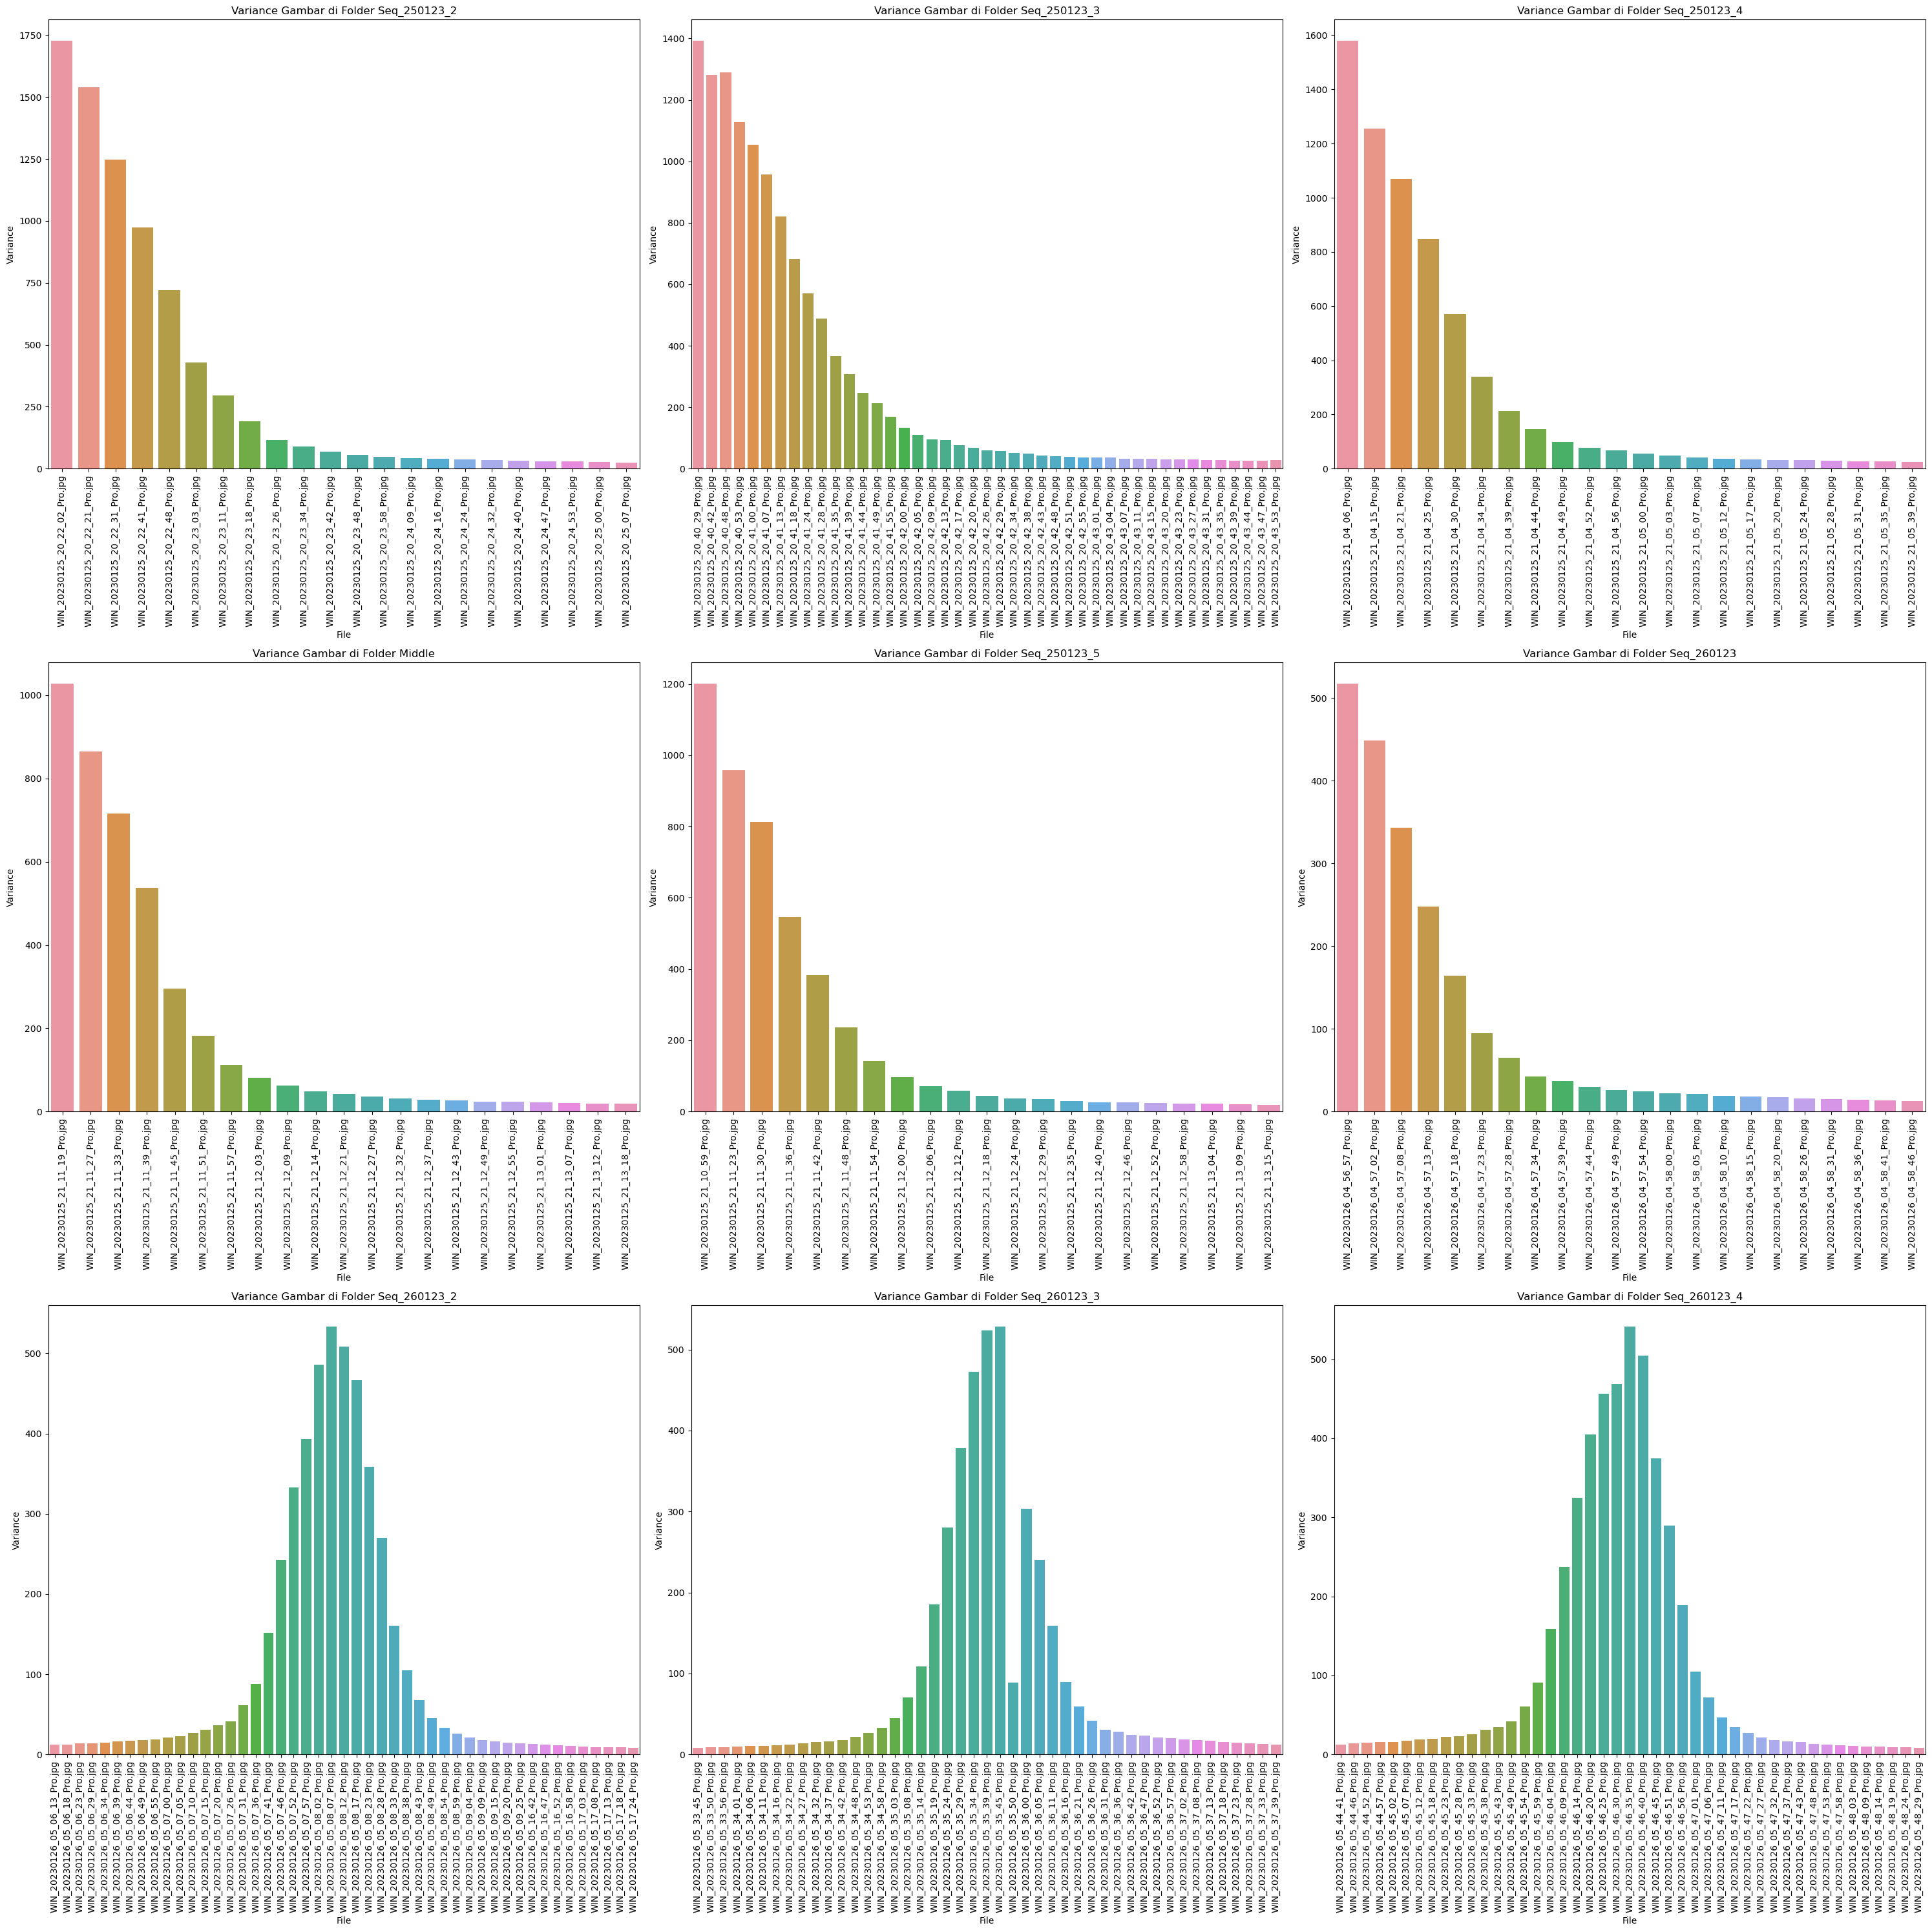

In [11]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

plt.figure(figsize=(30, 30))

for idx, folder in enumerate(unique_folders, start=1):
    folder_data = df[df['Folder'] == folder]
    
    plt.subplot(3, 3, idx)
    sns.barplot(x='File', y='Variance', data=folder_data)
    plt.xticks(rotation=90)
    plt.xlabel('File')
    plt.ylabel('Variance')
    plt.title(f'Variance Gambar di Folder {folder}')
    
plt.tight_layout()
plt.show()


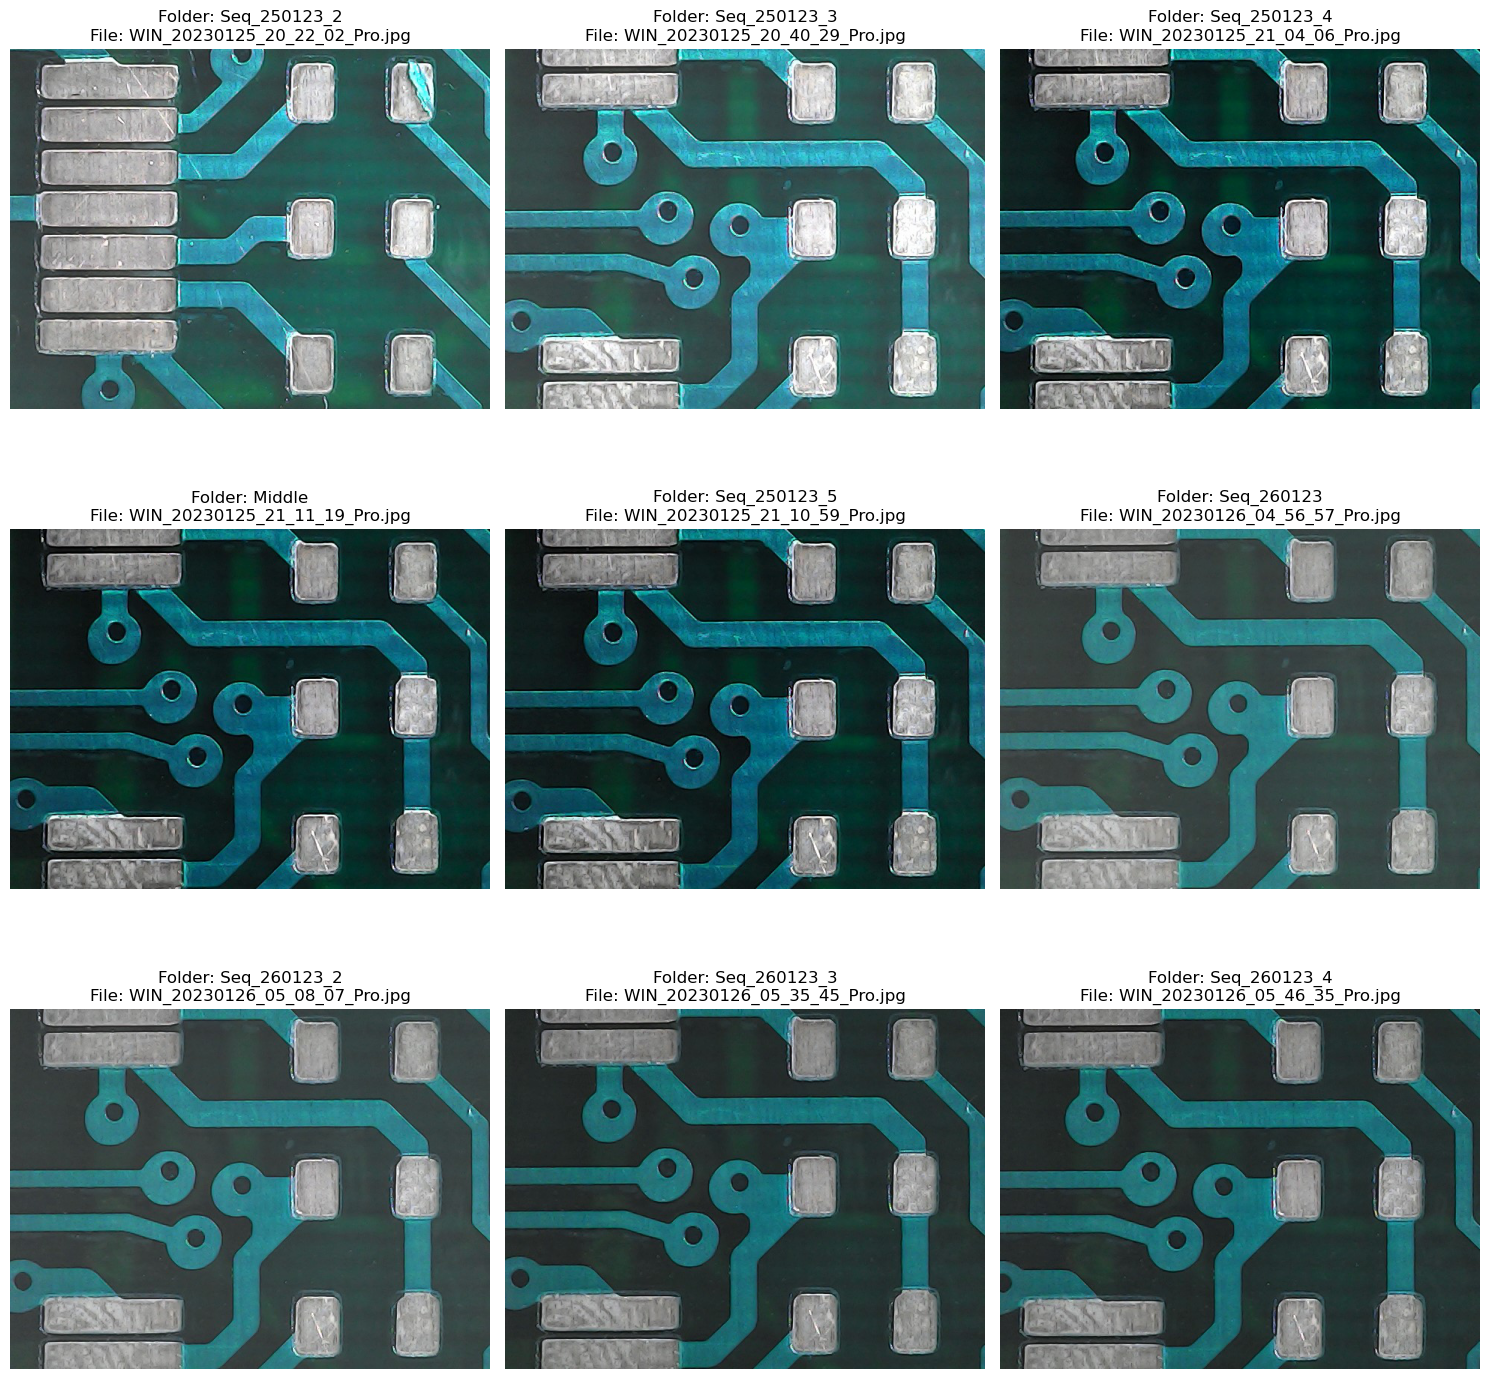

In [12]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for idx, folder in enumerate(unique_folders, start=1):
    folder_data = df[df['Folder'] == folder]
    max_variance_image = folder_data.nlargest(1, 'Variance')
    
    # Susun nama path-nya
    folder_name = str(max_variance_image['Folder'].values[0])
    file_name = str(max_variance_image['File'].values[0])
    if folder_name == 'Middle':
        image_path = os.path.join(r'C:\Users\ACER\Documents\MY-CODE\Kuliah\Dataset PCB\Seq_250123_5\Middle', file_name)
    else:
        image_path = os.path.join(r'C:\Users\ACER\Documents\MY-CODE\Kuliah\Dataset PCB', folder_name, file_name)
    
    img = mpimg.imread(image_path)
    ax = axs[(idx - 1) // 3, (idx - 1) % 3]
    ax.set_title('Folder: {}\nFile: {}'.format(folder_name, file_name))
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()


## Barplot 10 Variance Tertinggi dari Keseluruhan Folder

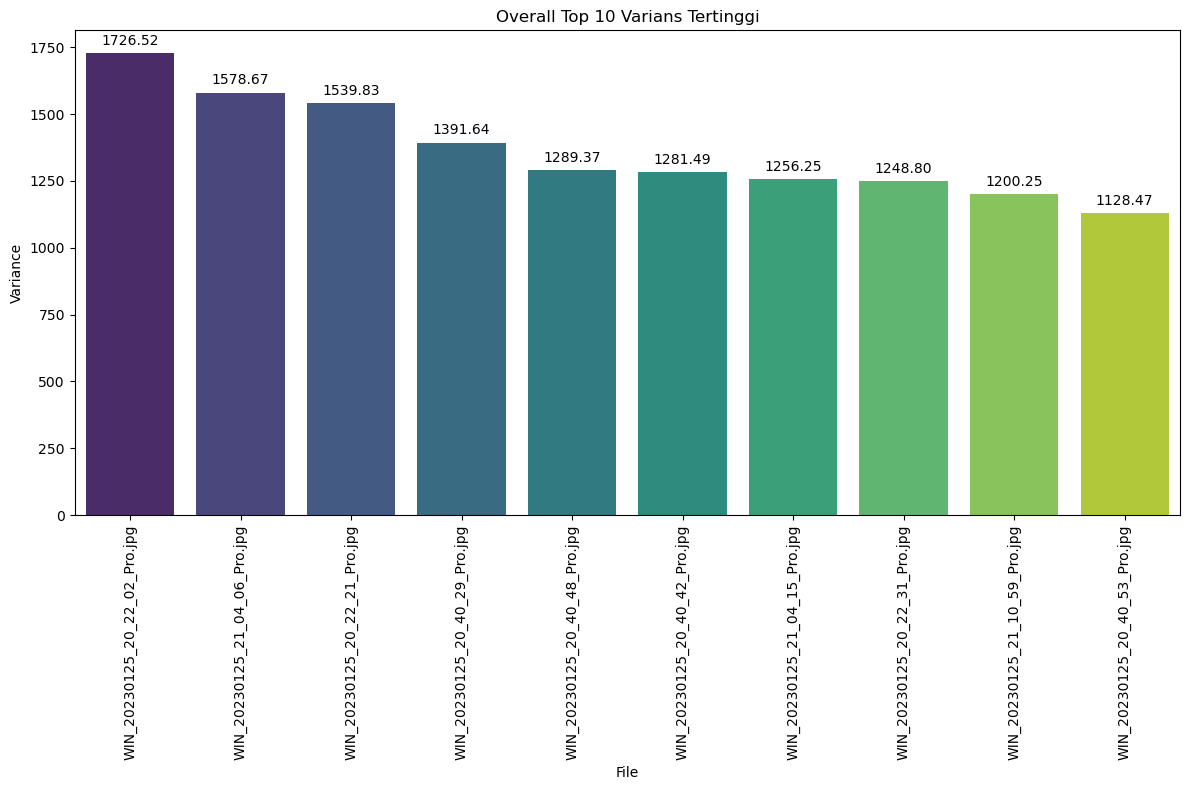

In [13]:
top_variances = df.nlargest(10, 'Variance')

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='File', y='Variance', data=top_variances, palette='viridis')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.xticks(rotation=90)
plt.xlabel('File')
plt.ylabel('Variance')
plt.title('Overall Top 10 Varians Tertinggi')
plt.tight_layout()
plt.show()

## Menampilkan 3 Gambar dengan Ketajaman Terbaik

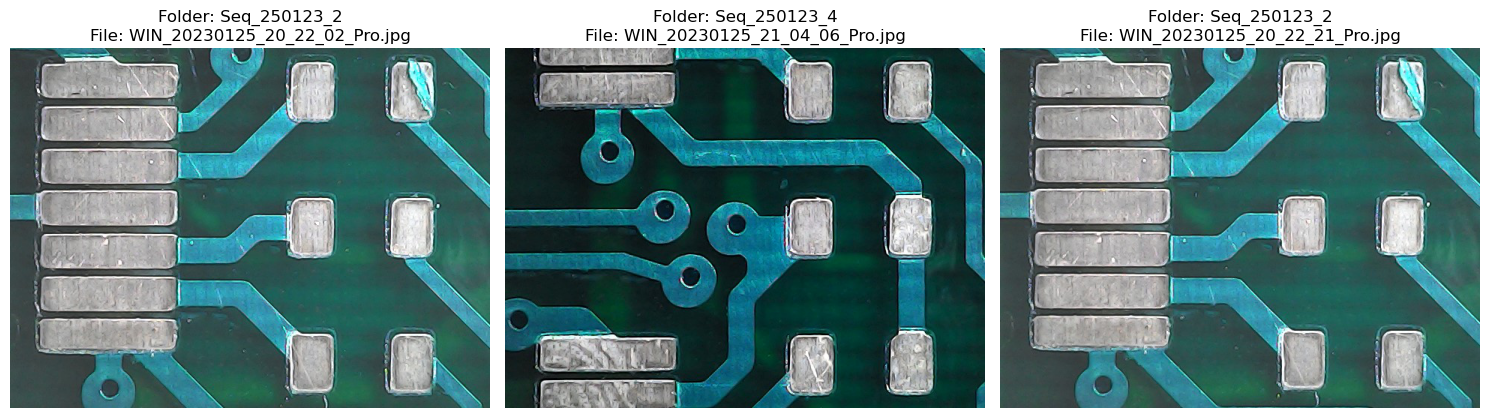

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
top_variances = df.nlargest(3, 'Variance')

for i, (_, baris) in enumerate(top_variances.iterrows(), 1):
    folder_name = baris['Folder']
    file_name = baris['File']

    if folder_name == 'Middle':
        image_path = os.path.join(r'C:\Users\ACER\Documents\MY-CODE\Kuliah\Dataset PCB\Seq_250123_5\Middle', file_name)
    else:
        image_path = os.path.join(r'C:\Users\ACER\Documents\MY-CODE\Kuliah\Dataset PCB', folder_name, file_name)
    plt.subplot(1, 3, i)
    img = mpimg.imread(image_path)
    plt.title('Folder: {}\nFile: {}'.format(folder_name, file_name), visible=True)
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()
plt.show()


## Barplot 10 Variance Terendah dari Keseluruhan Folder

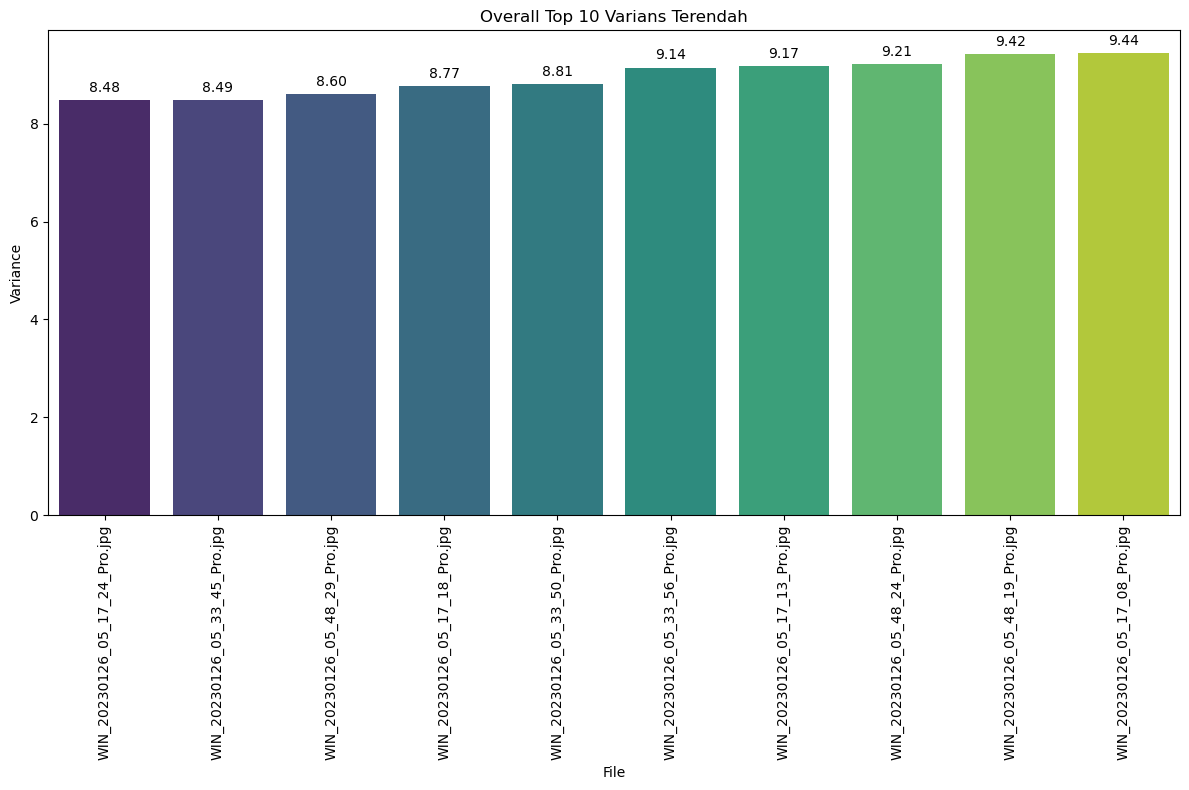

In [15]:
lowest_variances = df.nsmallest(10, 'Variance')

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='File', y='Variance', data=lowest_variances, palette='viridis')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.xticks(rotation=90)
plt.xlabel('File')
plt.ylabel('Variance')
plt.title('Overall Top 10 Varians Terendah')
plt.tight_layout()
plt.show()


## Menampilkan 3 Gambar dengan Ketajaman Terburuk

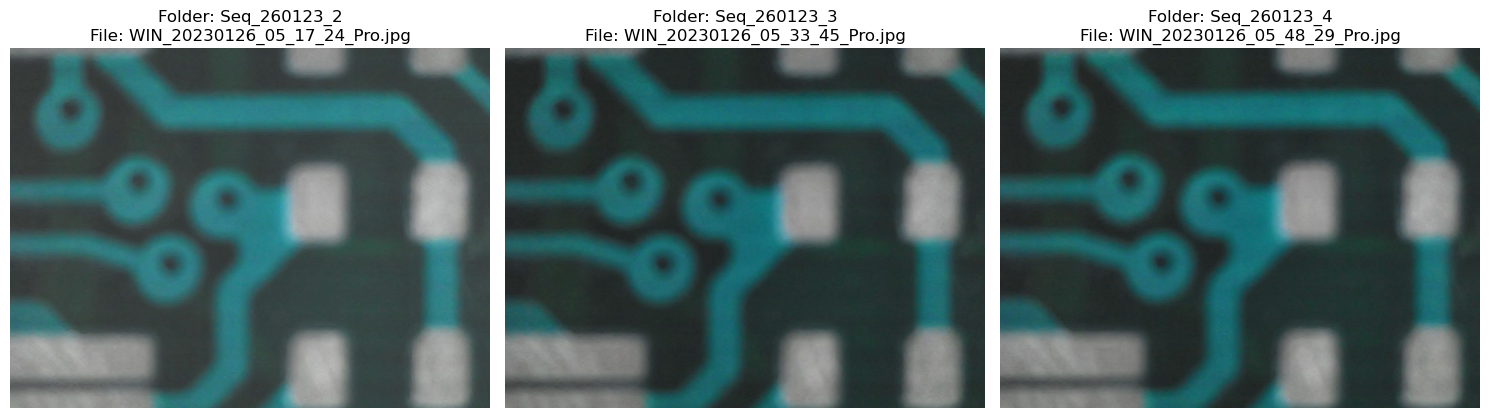

In [16]:
lowest_variances = df.nsmallest(3, 'Variance')
plt.figure(figsize=(15, 5))

for i, (_, baris) in enumerate(lowest_variances.iterrows(), 1):
    folder_name = baris['Folder']
    file_name = baris['File']

    if folder_name == 'Middle':
        image_path = os.path.join(r'C:\Users\ACER\Documents\MY-CODE\Kuliah\Dataset PCB\Seq_250123_5\Middle', file_name)
    else:
        image_path = os.path.join(r'C:\Users\ACER\Documents\MY-CODE\Kuliah\Dataset PCB', folder_name, file_name)
    plt.subplot(1, 3, i)
    img = mpimg.imread(image_path)
    plt.title('Folder: {}\nFile: {}'.format(folder_name, file_name), visible=True)
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()
plt.show()
